In [1]:
# -------------
# User Instructions
#
# Here you will be implementing a cyclic smoothing
# algorithm. This algorithm should not fix the end
# points (as you did in the unit quizzes). You  
# should use the gradient descent equations that
# you used previously.
#
# Your function should return the newpath that it
# calculates.
#
# Feel free to use the provided solution_check function
# to test your code. You can find it at the bottom.
#
# --------------
# Testing Instructions
# 
# To test your code, call the solution_check function with
# two arguments. The first argument should be the result of your
# smooth function. The second should be the corresponding answer.
# For example, calling
#
# solution_check(smooth(testpath1), answer1)
#
# should return True if your answer is correct and False if
# it is not.

from math import *
from copy import deepcopy

# Do not modify path inside your function.
path=[[0, 0], 
      [1, 0],
      [2, 0],
      [3, 0],
      [4, 0],
      [5, 0],
      [6, 0],
      [6, 1],
      [6, 2],
      [6, 3],
      [5, 3],
      [4, 3],
      [3, 3],
      [2, 3],
      [1, 3],
      [0, 3],
      [0, 2],
      [0, 1]]

############# ONLY ENTER CODE BELOW THIS LINE ##########

# ------------------------------------------------
# smooth coordinates
# If your code is timing out, make the tolerance parameter
# larger to decrease run time.
#

def smooth(path, weight_data = 0.1, weight_smooth = 0.1, tolerance = 0.00001):

    newpath = deepcopy(path)
    change = tolerance
    count = 0.0
    epochs = 50
    for epoch in range(epochs):
        change = 0.0
        count += 1 
        for i in range(0,len(path)):  
            for j in range(len(path[0])):
                aux = newpath[i][j]
                iaux = i + 1
                iaux = (iaux % len(path))
                newpath[i][j] += weight_data * (path[i][j] - newpath[i][j]) +  weight_smooth * (newpath[i-1][j] + newpath[iaux][j] - 2.0 * newpath[i][j])
                change += abs(aux-newpath[i][j])
  
    return newpath

# thank you - EnTerr - for posting this on our discussion forum

#newpath = smooth(path)
#for i in range(len(path)):
#    print '['+ ', '.join('%.3f'%x for x in path[i]) +'] -> ['+ ', '.join('%.3f'%x for x in newpath[i]) +']'


##### TESTING ######

# --------------------------------------------------
# check if two numbers are 'close enough,'used in
# solution_check function.
#
def close_enough(user_answer, true_answer, epsilon = 0.001):
    if abs(user_answer - true_answer) > epsilon:
        return False
    return True

# --------------------------------------------------
# check your solution against our reference solution for
# a variety of test cases (given below)
#
def solution_check(newpath, answer):
    if type(newpath) != type(answer):
        print ("Error. You do not return a list.")
        return False
    if len(newpath) != len(answer):
        print ('Error. Your newpath is not the correct length.')
        return False
    if len(newpath[0]) != len(answer[0]):
        print ('Error. Your entries do not contain an (x, y) coordinate pair.')
        return False
    for i in range(len(newpath)): 
        for j in range(len(newpath[0])):
            if not close_enough(newpath[i][j], answer[i][j]):
                print ('Error, at least one of your entries is not correct.')
                return False
    print ("Test case correct!")
    return True

# --------------
# Testing Instructions
# 
# To test your code, call the solution_check function with
# two arguments. The first argument should be the result of your
# smooth function. The second should be the corresponding answer.
# For example, calling
#
# solution_check(smooth(testpath1), answer1)
#
# should return True if your answer is correct and False if
# it is not.
    
testpath1 = [[0, 0],
             [1, 0],
             [2, 0],
             [3, 0],
             [4, 0],
             [5, 0],
             [6, 0],
             [6, 1],
             [6, 2],
             [6, 3],
             [5, 3],
             [4, 3],
             [3, 3],
             [2, 3],
             [1, 3],
             [0, 3],
             [0, 2],
             [0, 1]]

answer1 = [[0.4705860385182691, 0.4235279620576893], 
           [1.1764695730296597, 0.16470408411716733], 
           [2.058823799247812, 0.07058633859438503], 
           [3.000001503542886, 0.04705708651959327], 
           [3.9411790099468273, 0.07058689299792453], 
           [4.8235326678889345, 0.16470511854183797], 
           [5.529415336860586, 0.4235293374365447], 
           [5.76470933698621, 1.1058829941330384], 
           [5.764708805535902, 1.8941189433780983], 
           [5.5294138118186265, 2.5764724018811056], 
           [4.823530348360371, 2.835296251305122], 
           [3.941176199414957, 2.929413985845729],
           [2.9999985709076413, 2.952943245204772], 
           [2.0588211310939526, 2.9294134622132018], 
           [1.1764675231284938, 2.8352952720424938], 
           [0.4705848811030855, 2.5764710948028178], 
           [0.23529088056307781, 1.8941174802285707], 
           [0.23529138316655338, 1.1058815684272394]]

testpath2 = [[1, 0], # Move in the shape of a plus sign
             [2, 0],
             [2, 1],
             [3, 1],
             [3, 2],
             [2, 2],
             [2, 3],
             [1, 3],
             [1, 2],
             [0, 2], 
             [0, 1],
             [1, 1]]

answer2 = [[1.2222234770374059, 0.4444422843711052],
           [1.7777807251383388, 0.4444432993123497], 
           [2.111114925633848, 0.8888894279539462], 
           [2.5555592020540376, 1.2222246475393077], 
           [2.5555580686154244, 1.7777817817879298], 
           [2.111111849558437, 2.1111159707965514], 
           [1.7777765871460525, 2.55556033483712], 
           [1.2222194640861452, 2.5555593592828543], 
           [0.8888853322565222, 2.111113321684573], 
           [0.44444105139827167, 1.777778212019149], 
           [0.44444210978390364, 1.2222211690821811], 
           [0.8888882042812255, 0.8888870211766268]]

# solution_check(smooth(testpath2), answer2)

Test case correct!


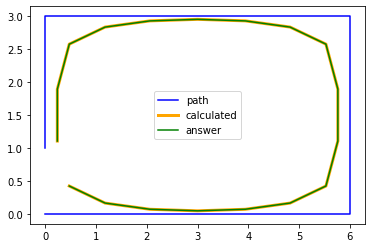

In [2]:
import matplotlib.pyplot as plt
path1_smooth = smooth(testpath1)
solution_check( path1_smooth , answer1)

plt.plot([j[0] for j in testpath1],[j[1] for j in testpath1], color='blue', label="path")
plt.plot([j[0] for j in path1_smooth],[j[1] for j in path1_smooth], color='orange',label="calculated",linewidth=3)
plt.plot([j[0] for j in answer1],[j[1] for j in answer1], color='green',label="answer")
plt.legend()

Test case correct!


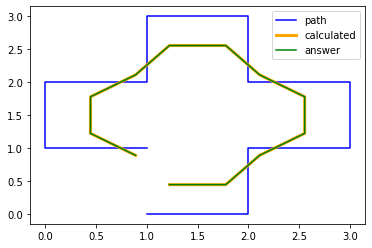

In [3]:
import matplotlib.pyplot as plt
path2_smooth = smooth(testpath2)
solution_check( path2_smooth , answer2)

plt.plot([j[0] for j in testpath2],[j[1] for j in testpath2], color='blue', label="path")
plt.plot([j[0] for j in path2_smooth],[j[1] for j in path2_smooth], color='orange',label="calculated",linewidth=3)
plt.plot([j[0] for j in answer2],[j[1] for j in answer2], color='green',label="answer")
plt.legend()